## Задача 1

In [10]:
import numpy as np
def align(v, w, match=1, mismatch=-1, gap_new=0, gap=-1):
    
    def cmp(a, b):
        if (a == b):
            return match
        else:
            return mismatch
    
    n = len(v)
    m = len(w)
    
    right = np.zeros((n+1, m+1))
    down  = np.zeros((n+1, m+1))
    diag  = np.zeros((n+1, m+1))
    
    # init right
    right[1:, 0:1] = np.full((n,1), -np.inf)
    
    # init down
    down[0:1, 1:] = np.full((1,m), -np.inf)
        
    # init diag
    diag[0:1, 1:] = np.full((1,m), -np.inf)
    diag[1:, 0:1] = np.full((n,1), -np.inf)
        
    for i in range(1, n+1):
        for j in range(1, m+1):
            right[i][j] = np.max([right[i][j-1] + gap, diag[i][j-1] + gap + gap_new])
            down[i][j]  = np.max([down[i-1][j] + gap, diag[i-1][j] + gap + gap_new])
            diag[i][j]  = np.max([diag[i-1][j-1] + cmp(v[i-1], w[j-1]), down[i][j], right[i][j]])

    # Traceback
    v_aligned, w_aligned = "", ""
    i, j = n, m
    
    while not (i == 0 and j == 0):
        if (i>0 and j>0 and diag[i][j] == diag[i-1][j-1] + cmp(v[i-1], w[j-1])):
            v_aligned = w[j-1] + v_aligned
            w_aligned = v[i-1] + w_aligned
            i -= 1
            j -= 1
        elif (i>0 and diag[i][j] == down[i][j]):
            v_aligned = '-' + v_aligned
            w_aligned = v[i-1] + w_aligned
            i -= 1
        elif (j>0 and diag[i][j] == right[i][j]):
            v_aligned = w[j-1] + v_aligned
            w_aligned = '-' + w_aligned
            j -= 1
    
    print("%s\n%s" % (v_aligned, w_aligned))

In [11]:
align("TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC",
      "AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC", 
      match=1, mismatch=-1, gap=-1, gap_new=0)

AATTGCCGCCGTCGT-TTTCA---G-CA-G-TTATGTCAGA-TC
T----CC-CAGT--TATGTCAGGGGACACGAGCATG-CAGAGAC


In [12]:
align("TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC",
      "AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC", 
      match=1, mismatch=-1, gap=-0.01, gap_new=-100)

AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC
TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC


In [4]:
align("TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC",
      "AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC", 
      match=1, mismatch=-1, gap=-0.3, gap_new=0.5)

AATTGCCGCCGTC-GTT-T-TCA---G-CA-GTTATG--T-CAGAT--C
T----CC-C----AGTTATGTCAGGGGACACG--A-GCATGCAGA-GAC


## Задача 2

In [5]:
from random import choices

def seq_generate(n):
    return "".join(choices(["A", "G", "T", "C"], k=n))

In [47]:
seq_generate(100)

'TTGTGCCTTAACCTCGGTTATATTGCTATTCCGAATCTATGAAATAGCTGGGGGGGTAAACTCTTGCGATTTTGGTAACCAGTAGCATGGGCCATCGATA'

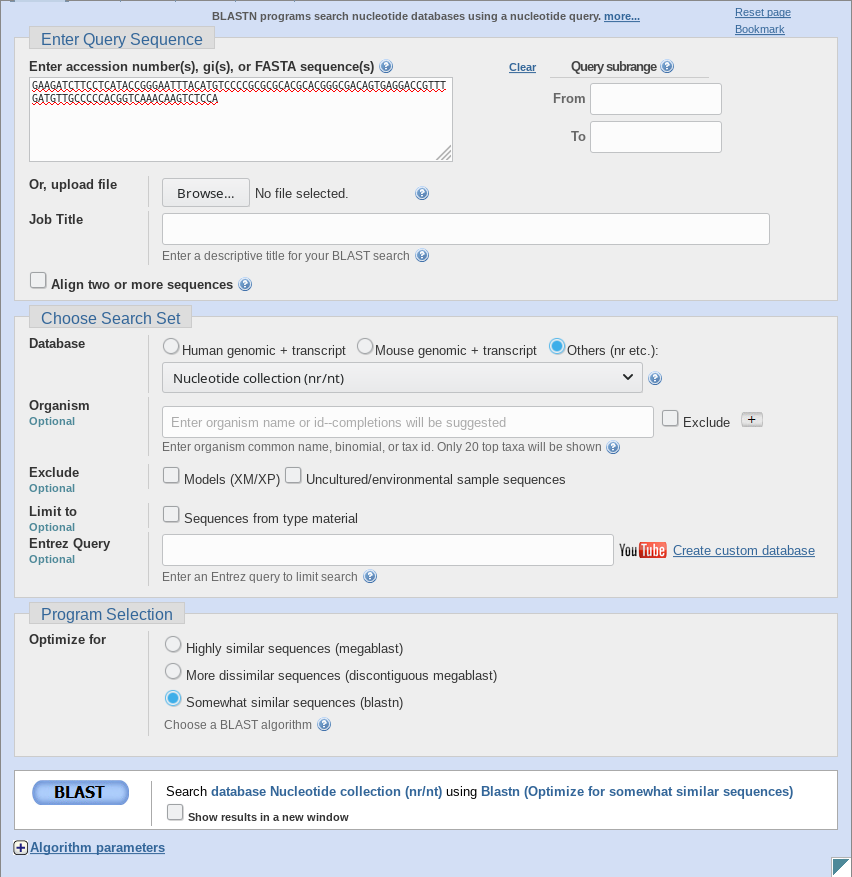

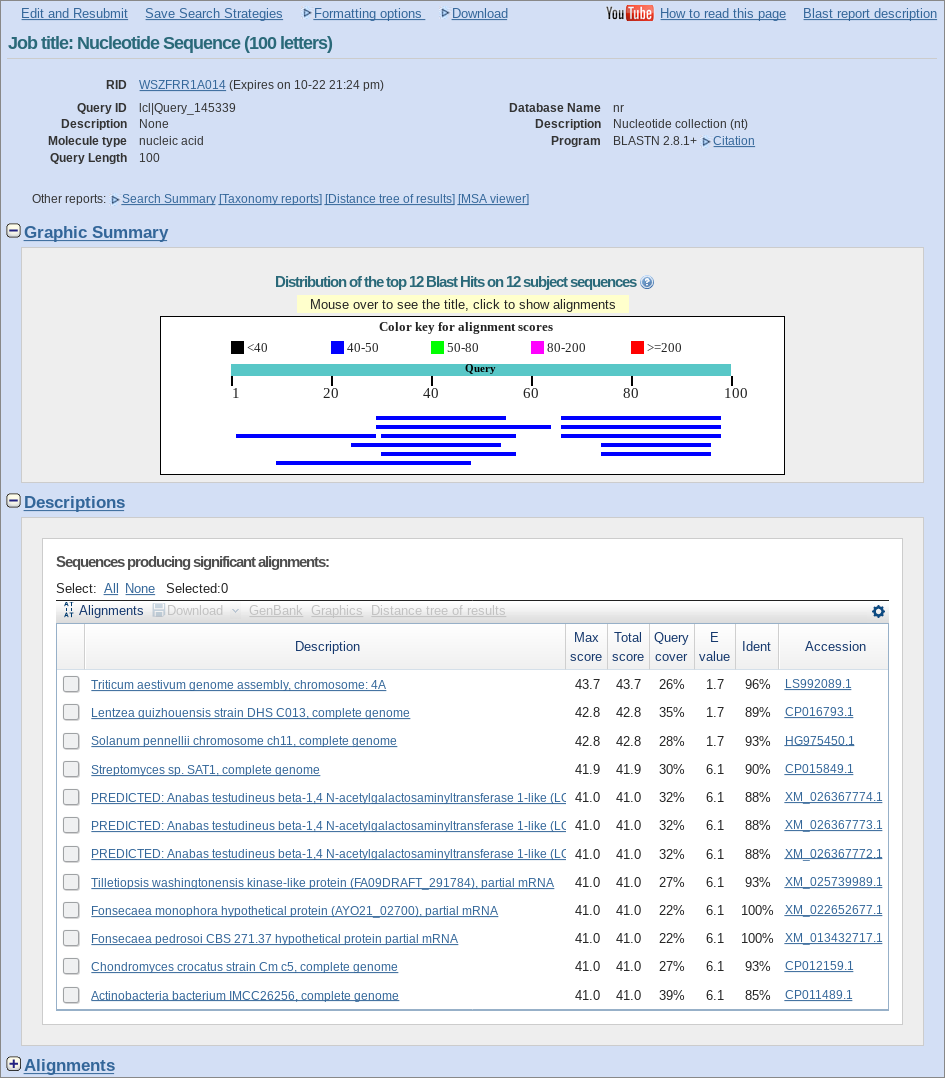

In [3]:
seq_generate(1000)

'ACACTCTAGATACAAGGTCTATAATAATAGCAAAGGCGACCATCTATCAGAATGGGCCTACAGGGCATTGGCATATCCGAGCCCCTGCTCAATTCGAACCCACATGTATAGCAACTAGCTGTTCCTAATTAAGGTCTTCCTACGTATTAGGGGCCCGCGACAGTCAGGTCCTGACACCCATGTGACGATCTCTCTCACCTCTGGTGTCCAGGGGTAGGAATCATAAGTTCCATGTGACAGGGGACGCTCAACCACGGGCTTCATCAACCCCAAGATGCGGATGGCTCACTGTTGGTCTTCTTTCAGGGCTATACTAGTGGTACGACTCCAACCGCACAACAACCTATGAGTCGAACTAGGACTATATCGCTATTACAAGCAGGACAAACCCAAGGACGAGGTGTAAGCGCTCGATAAGAGTAGTGCGGAGCCCAGCTCAGCACTGTGCTTCATTAAAGCTCCGTGATTTCTTATGTTCGCCAATCGCTCGACTTGGTACGTGGAGTAGAATGGCACGAACAGGTCTGCGCCAAACAGCCATAAATCCGAGTGTGCGTGTGTGTTCTCACCGTTCTTCCGCGTTAATTCTCAAGCATTGTCAAGGGGGTCGTTCAGGCTGTCACTGATCACACCCGTTTTCGAGCTAGCGAGAGATAGCCTATCAGGTGTCTTTTTAAATCACATGTAGACTCTTCCCAAGGTGAACCAGCTAGGCTTCTAACTCACCTGAGAGCGTAATTCCAACTCCATTGTTCTAACATATGTTCGCTATAATGTAACAAAATGCGGGACGCTGGGATGTGGAAATGGGGAACTGATGTTAATGTTTTTAGTGATTCTATCGACACTAGGGCAGGTGTATATACAGATGAGCGATGGCATGTTGTGTGGCACCACTCGGGTCACACCGCGCCTAAAGGTGAGCCCTGTACACGTGGCACATGAGCTCCTATAGCCTACAATGATAATGCCGGCTTTGACAGGCTATCGGTAAGATGT

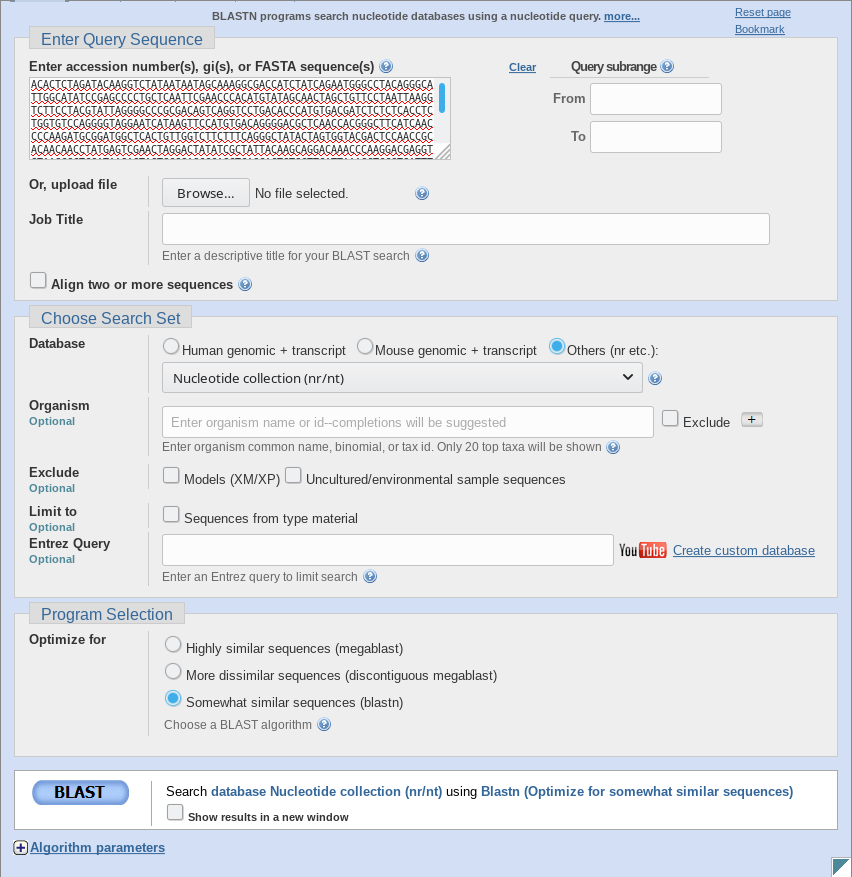

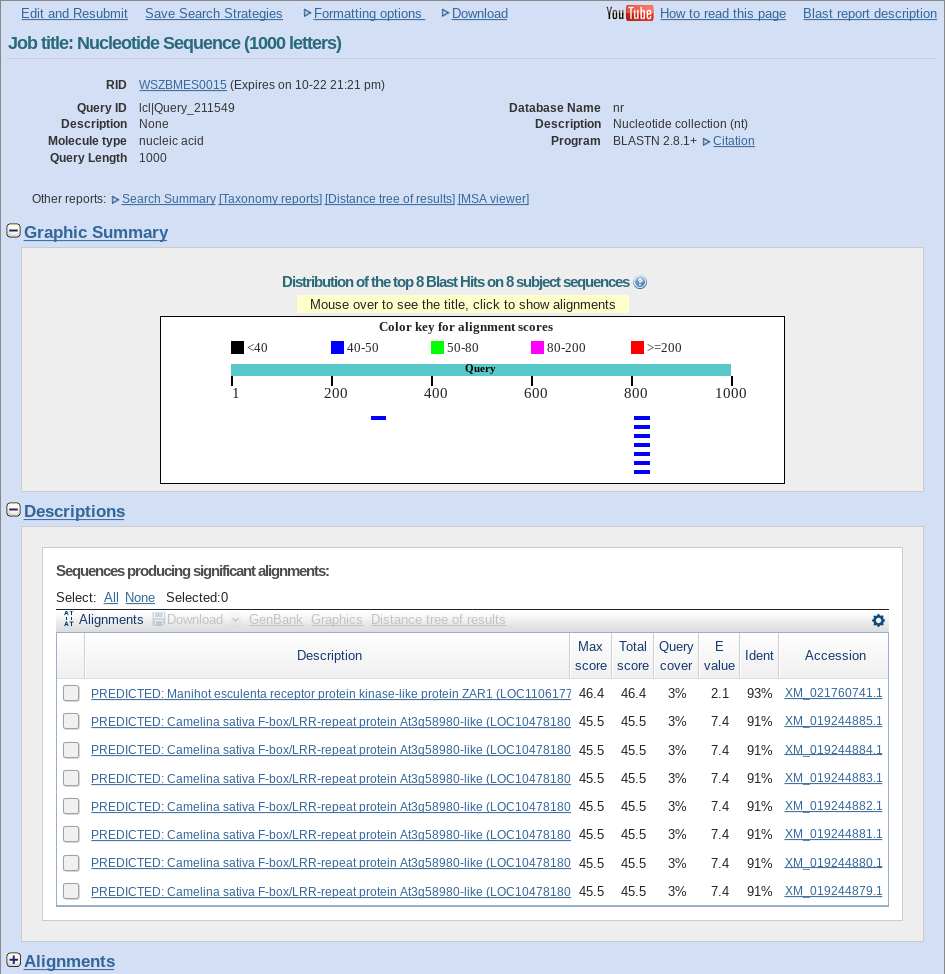

In [4]:
seq_generate(100000)

'GTTATGACATACCCGGGGTGAGACCGGTTTATCACGAGAGTATTCATAGGGAGGCCCTGGGCTCCCTGTTACAAAGGTCAAATTTATAAACGGTCAAGCACTAACATGGGTCATCCGTGCGTGGACACTGCTGCAGTGCACTATTGCTACTCCTACCGCATAATGCATAGATAAGGTTCACACCCAATTTAGCAACAGGCCAAGTTCAAGGCTGCCGACAGCGAAGTGTCTAAAGGGGATCCTTCTCTACCAATTCCAAGACTCTATTCCTGGTGAGGTGTGGGTCACTGGCAGCCGACCTGACCAAAAAATTGCATATCAAGGGCCTGATTTTGCGCCAAGCCAGTATCGTGTAAGCTTTGGCTTTTTGCGAGGTACAGTACGCTAGGAATCGATGACATAAAGGGGTCACAACCGCGCGCGAAAGAGTCAGTCCTGGTGCGGTCAATACAGTAGGAATTCGCCGTACGATTCACGTGCGTTCAGATCATTGACTAACGGGTATTATGAGTCTGTCCGACCACTCGGCTTAGAAGTAATCCGGTTGACCGCTGGGGACACCCTCGTGATTTCCTTATATCGGAGCTCGCGGCAGTGCCGAGACTGGCATTGCGGAAGAGCTTAGAAGTCGTTAACAAAGGCAAAACAAGATGGCCCGAGCTTATCATGGGCAGCGTTGCGTAGTTGTCATTCAGCCCCTTTCAAGCGTTCTAGGATCGCAGTAGGCGGGGCTTCTCCTGCCAGAGGTAATCGGGAGGAACCATGCTGGTCGTCCGATCCGGTCTCGTTTCTGTCGCTCTGCTGGCTCTGCCAGTGCCTACGGCGTTAAGGACGCCGACTTCGGGGGGAACCCAACGAATAGGATTTTGGGACCTATACAATAGACCTGCTCTACTGCAACAGGGAGAAGTAGCACAACTTTGTCAATGCCCGTGGCGCCAGGGAGAGACTATTCTGGACATGTACTGACAATCGGATCTAGGTTGTAACTTTAATGCG

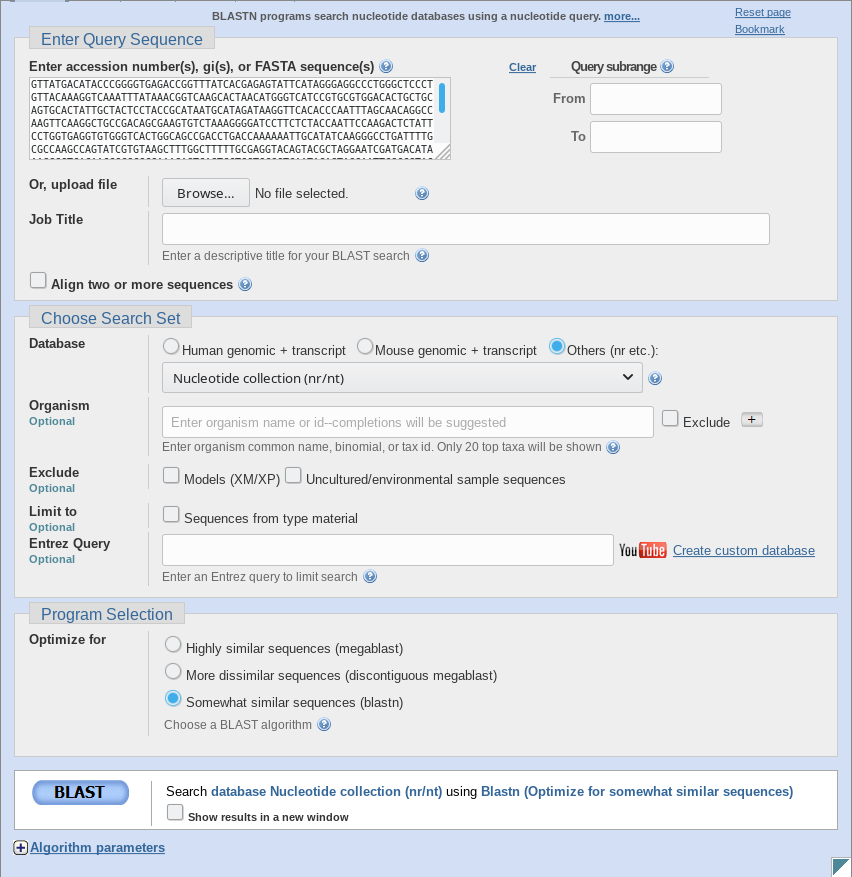

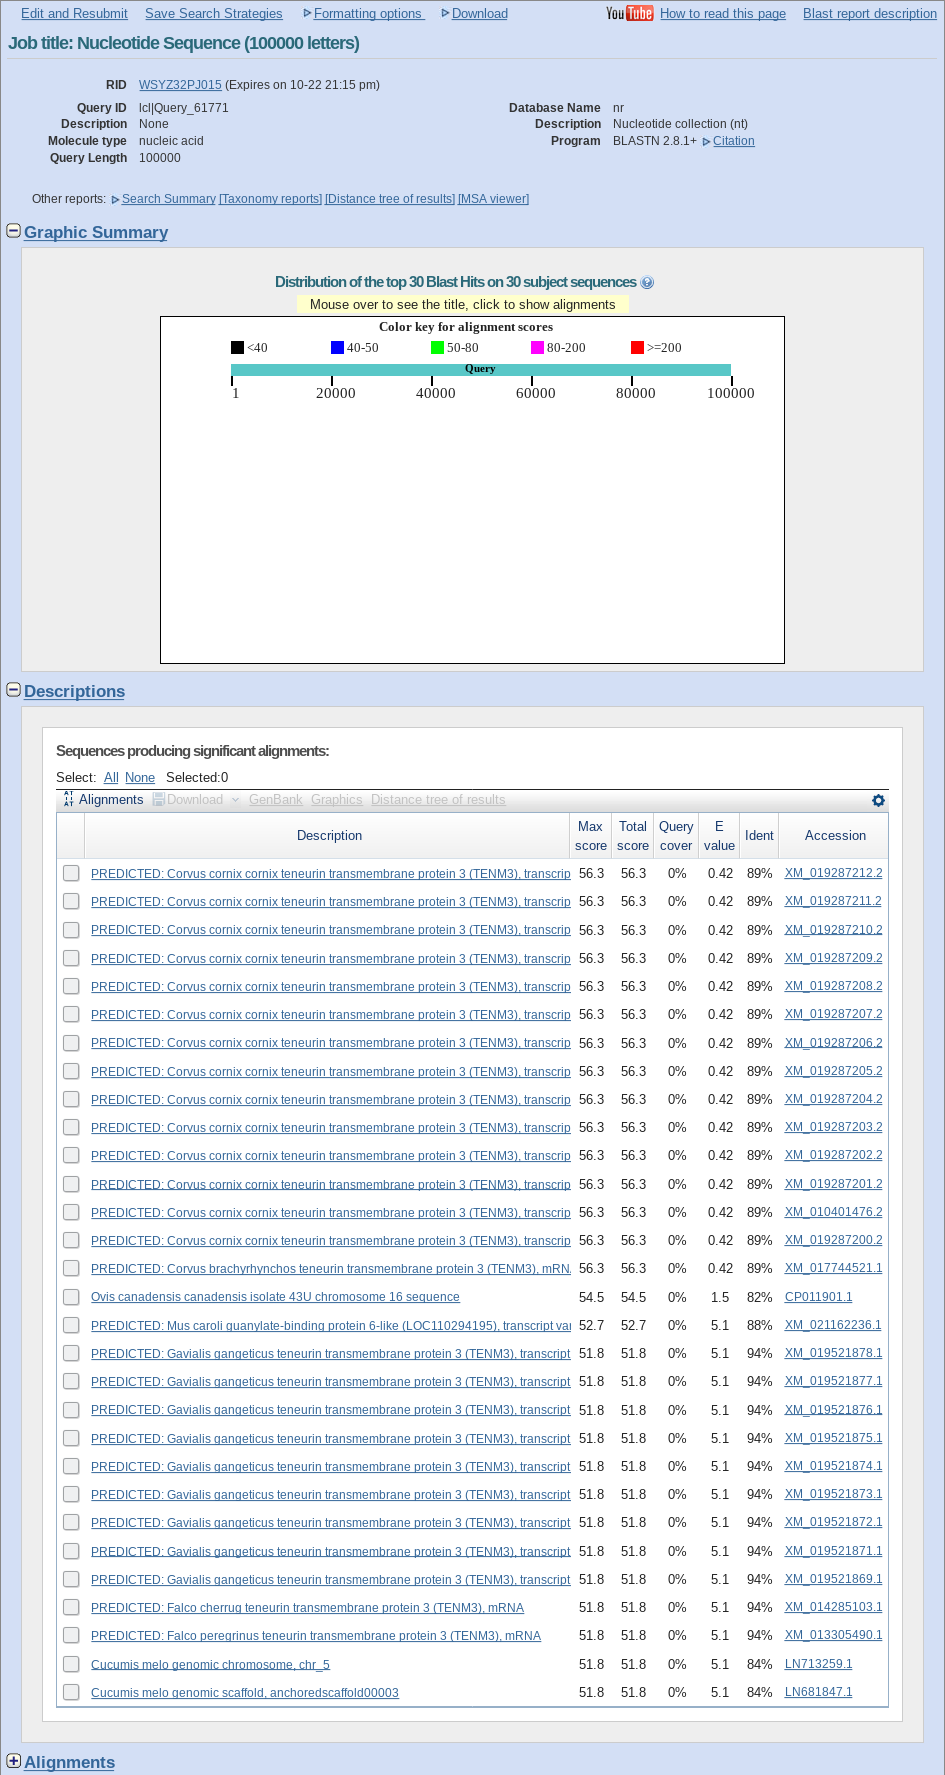